AMRUTHA KANAKATTE RAVISHANKAR;
    CWID :20027346

Q4. Load the “UCI_liver_cirrhosis.CSV” dataset, from the raw_data module in CANVAS, into Python (see the data dictionary at the bottom of this document). This is a dataset used for predicting “Liver problems” in patients. Delete any rows with any missing values. Discretize TB and TP into four quartiles (TB_quartiles and TP_quartiles).  Construct a Naïve Bayes model to classify “Liver Problems” (Selector) based only on the “Gender”,”Age_quartile, “A_G_Cat”, TB_quartiles and TP_quartiles.

In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the dataset
df = pd.read_csv('UCI_liver_cirrhosis.csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A_G_ratio,Selector,Gender_ind,Age_quartiles,A_G_Cat
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,age_Q4,A_G_cat2
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,age_Q4,A_G_cat1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,age_Q4,A_G_cat2
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,age_Q3,A_G_cat2
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,age_Q4,A_G_cat1


In [3]:
#Remove rows with missing values
df.dropna(inplace=True)
print(df.shape)

(579, 14)


In [4]:
# Discretize "TB" and "TP" and "Age" into quartiles
df['TB_quartiles'] = pd.qcut(df['TB'], q=4, labels=False)
df['TP_quartiles'] = pd.qcut(df['TP'], q=4, labels=False)
df['Age_quartile'] = pd.qcut(df['Age'], q=4, labels=False)

In [5]:
# Ensure categorical encoding for "Gender" and "A_G_Cat"
le_gender = LabelEncoder()
le_ag_cat = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['A_G_Cat'] = le_ag_cat.fit_transform(df['A_G_Cat'])

In [6]:
# Select features and target variable
features = ['Gender', 'Age_quartile', 'A_G_Cat', 'TB_quartiles', 'TP_quartiles']
target = 'Selector'

X = df[features]
y = df[target]

In [7]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [9]:
# Predictions
y_pred = nb_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.80      0.77        83
           2       0.37      0.30      0.33        33

    accuracy                           0.66       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.64      0.66      0.64       116

Accuracy Score:
0.6551724137931034
Confusion Matrix:
[[66 17]
 [23 10]]


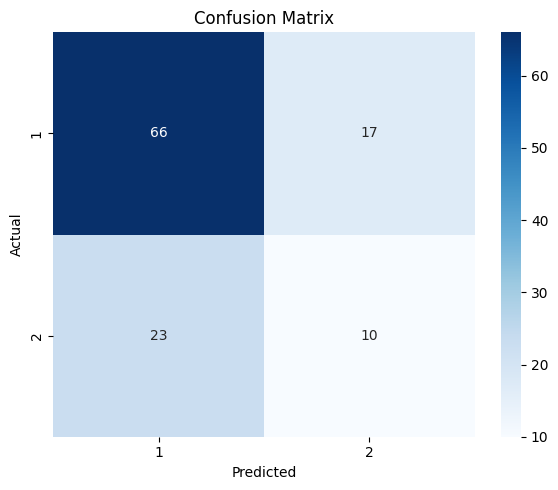

In [10]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()